In [34]:
import praw
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd

In [35]:
from dotenv import load_dotenv
import os

load_dotenv()

cid = os.getenv('REDDIT_CLIENT_ID')
secret = os.getenv('REDDIT_CLIENT_SECRET')
agent = os.getenv('REDDIT_USER_AGENT')

In [36]:
reddit = praw.Reddit(
    client_id=cid,
    client_secret=secret,
    user_agent=agent
)

# fetch top 100 posts from r/stocks subreddit
subreddit = reddit.subreddit('teslamotors')
posts = subreddit.hot(limit=100)

# extract titles of the posts
reddit_posts = [post.title for post in posts]

# display first 5 posts
print(reddit_posts[:5])



['Referrals, posting or commenting.', 'Canada Announces 25% Tariffs on U.S. Goods, including Tesla and Other EVs', 'Inside Modern Tesla Super Charger', 'Full Self-Driving (Supervised) Discount - Tesla Insurance', 'Tesla Increases Model 3 Referral Discount to $2,500 in the U.S.']


In [38]:
# initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# list of sentiment scores
sentiment_scores = []

# Analyze sentiment of each post
for post in reddit_posts:
    blob = TextBlob(post.title)
    sentiment = blob.sentiment.polarity  # Positive or negative sentiment score
    sentiment_scores.append(sentiment)

# Display first 5 sentiment scores
print(sentiment_scores[:5])


TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'builtin_function_or_method'>

In [29]:
# fetch Tesla stock data
tsla = yf.Ticker("TSLA")
stock_data = tsla.history(period="30d") 

# Display the stock data
print(stock_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2024-12-17 00:00:00-05:00  475.899994  483.989990  457.510010  479.859985   
2024-12-18 00:00:00-05:00  466.500000  488.540009  427.010010  440.130005   
2024-12-19 00:00:00-05:00  451.880005  456.359985  420.019989  436.170013   
2024-12-20 00:00:00-05:00  425.510010  447.079987  417.640015  421.059998   
2024-12-23 00:00:00-05:00  431.000000  434.510010  415.410004  430.600006   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-12-17 00:00:00-05:00  131223000        0.0           0.0  
2024-12-18 00:00:00-05:00  149340800        0.0           0.0  
2024-12-19 00:00:00-05:00  118566100        0.0           0.0  
2024-12-20 00:00:00-05:00  132216200        0.0           0.0  
2024-12-23 00:00:00-05:00   72698100        0.0           0.0  


In [32]:
# Create a DataFrame for sentiment scores (make sure time aligns with stock data)
sentiment_df = pd.DataFrame({
    'time': stock_data.index,  # Align sentiment with stock date
    'sentiment': sentiment_scores  # Sentiment scores
})

# Merge sentiment with stock data
merged_df = pd.merge(stock_data, sentiment_df, left_index=True, right_on="time", how="inner")
print(merged_df.head())

NameError: name 'sentiment_scores' is not defined

2025-01-23 00:00:00 2025-01-27 03:00:00
2025-01-23 09:30:00 2025-01-31 15:30:00


/var/folders/xh/dn9y661s7w9615dcy5bxlt600000gn/T/ipykernel_66969/10592207.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


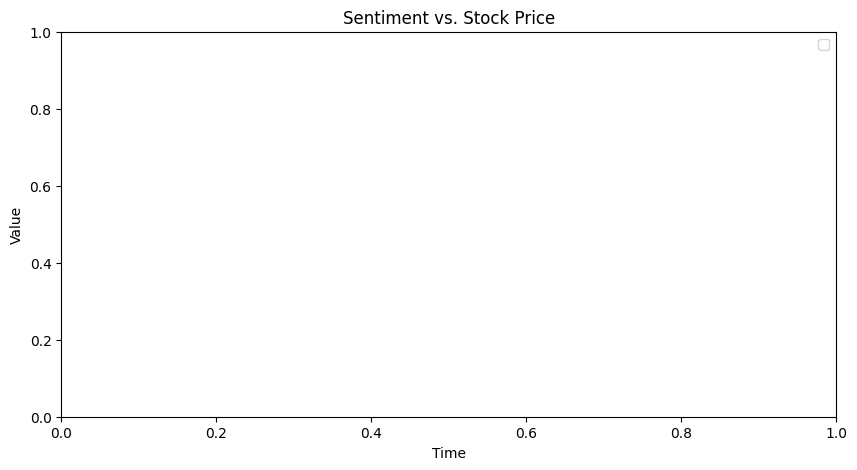

Empty DataFrame
Columns: [time, sentiment, Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []
sentiment    0
Close        0
dtype: int64


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert stock data time column to UTC (if it's not already)
stock_data['time'] = stock_data.index.tz_localize(None)
sentiment_df['time'] = sentiment_df['time'].dt.tz_localize(None)


print(sentiment_df['time'].min(), sentiment_df['time'].max())  # Print time range for sentiment data
print(stock_data['time'].min(), stock_data['time'].max())  # Print time range for stock data


# Convert sentiment scores to a DataFrame for easy plotting
sentiment_df = pd.DataFrame({"time": pd.date_range(start="2025-01-23", periods=len(reddit_sentiments), freq="h"),
                             "sentiment": reddit_sentiments})

# Merge sentiment data with stock data (assuming stock_data is available)
merged_df = sentiment_df.merge(stock_data, on="time", how="inner")

# Plot sentiment vs. stock price
plt.figure(figsize=(10,5))
sns.lineplot(x=merged_df["time"], y=merged_df["sentiment"], label="Sentiment Score", color="blue")
sns.lineplot(x=merged_df["time"], y=merged_df["Close"], label="Stock Price", color="red")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Sentiment vs. Stock Price")
plt.legend()
plt.show()

# Check if merged_df has data
print(merged_df.head())

# Check if sentiment and Close columns are not empty
print(merged_df[['sentiment', 'Close']].isnull().sum())